In [2]:
# 導入第三方模塊 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rc("font",family="SimHei",size="15") #解決中文亂碼問題
import numpy as np

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# 導入數據 
df = pd.read_excel("tr.xlsx", engine='openpyxl')
df.head()

outcome   AGE SEX   LOS Joint  Drain  Cemented  Commercial_ALBC  \
0        1  59.0   F   8.0   TKA      1         1                0   
1        1  69.0   M   5.0   TKA      1         1                1   
2        1  80.0   M   8.0   TKA      1         1                0   
3        1  66.0   M  14.0   TKA      1         1                0   
4        1  52.0   F   4.0   TKA      1         0                0   

   Non_commercial_ALBC  cci_index  elx_index  Blood_trans  OP_time_minute  \
0                    1          0          0            0             NaN   
1                    0          1          1            0           127.0   
2                    1          1          1            0             NaN   
3                    1          0          0            0           224.0   
4                    0          1          2            1             NaN   

   OP_time_hour  ASA  CBC_WBC  CBC_RBC  CBC_HG  CBC_HT  CBC_MCV  CBC_MCH  \
0           NaN  NaN      NaN      NaN     NaN     NaN      NaN      NaN   
1      2.116667  3.0      NaN      NaN     NaN     NaN      NaN      NaN   
2           NaN  NaN      NaN      NaN     NaN     NaN      NaN      NaN   
3      3.733333  2.0      NaN      NaN   12.59     NaN      NaN      NaN   
4           NaN  NaN      NaN      NaN     NaN     NaN      NaN      NaN   

   CBC_MCHC  CBC_RDW  CBC_Platelet  CBC_RDWCV   BUN  Crea   GOT   GPT   ALB  \
0       NaN      NaN           NaN        NaN   NaN   NaN   NaN   NaN   NaN   
1       NaN      NaN           NaN        NaN  14.2  1.05  24.0  13.0  4.52   
2       NaN      NaN           NaN        NaN   NaN   NaN   NaN   NaN   NaN   
3       NaN      NaN           NaN        NaN  11.1  0.90  25.0  19.0  4.38   
4       NaN      NaN           NaN        NaN   NaN   NaN   NaN   NaN   NaN   

   Na   K   UA  Diagnosis  Congestive Heart Failure  Cardiac Arrhythmia  \
0 NaN NaN  NaN          0                         0                   0   
1 NaN NaN  6.9          0                         0                   0   
2 NaN NaN  NaN          0                         0                   0   
3 NaN NaN  4.2          0                         0                   0   
4 NaN NaN  4.1          2                         0                   0   

   Valvular Disease  Heart disease  Pulmonary Circulation Disorders  \
0                 0              0                                0   
1                 0              0                                0   
2                 0              0                                0   
3                 0              0                                0   
4                 0              0                                0   

   Peripheral Vascular Disorders  Hypertension Uncomplicated  Paralysis  \
0                              0                           0          0   
1                              0                           1          0   
2                              0                           0          0   
3                              0                           0          0   
4                              0                           0          0   

   Other Neurological Disorders  Chronic Pulmonary Disease  Lung disease  \
0                             0                          0             0   
1                             0                          0             0   
2                             0                          0             0   
3                             0                          0             0   
4                             0                          0             0   

   Diabetes  Hypothyroidism  Renal Failure  Liver Disease  \
0         0               0              0              0   
1         0               0              0              0   
2         1               0              0              0   
3         0               0              0              0   
4         0               0              0              0   

   Peptic Ulcer Disease excluding 

## 處理數據不平衡問題

In [2]:
df1 = pd.read_csv("output_final.csv")

### 方法一

In [22]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df1[df1.outcome==0]
df_minority = df1[df1.outcome==1]

print(len(df1))
print(len(df_majority))
print(len(df_minority))
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=48269,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.outcome.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

# 輸出csv
df_upsampled.to_csv("output_final2.csv", index=False)

49140
48269
871


In [5]:
df1.groupby('outcome').count()

AGE    SEX    LOS  Joint  Drain  Cemented  Commercial_ALBC  \
outcome                                                                 
0        48269  48269  48269  48269  48269     48269            48269   
1          871    871    871    871    871       871              871   

         Non_commercial_ALBC  cci_index  elx_index  Blood_trans  OP_time_hour  \
outcome                                                                         
0                      48269      48269      48269        48269         48269   
1                        871        871        871          871           871   

           ASA  CBC_WBC  CBC_RBC  CBC_HG  CBC_HT  CBC_MCV  CBC_MCH  CBC_MCHC  \
outcome                                                                        
0        48269    48269    48269   48269   48269    48269    48269     48269   
1          871      871      871     871     871      871      871       871   

         CBC_RDW  CBC_Platelet  CBC_RDWCV    BUN   Crea    GOT    GPT    ALB  \
outcome                                                                        
0          48269         48269      48269  48269  48269  48269  48269  48269   
1            871           871        871    871    871    871    871    871   

            Na      K     UA  Diagnosis  Congestive Heart Failure  \
outcome                                                             
0        48269  48269  48269      48269                     48269   
1          871    871    871        871                       871   

         Cardiac Arrhythmia  Valvular Disease  Heart disease  \
outcome                                                        
0                     48269             48269          48269   
1                       871               871            871   

         Pulmonary Circulation Disorders  Peripheral Vascular Disorders  \
outcome                                                                   
0                                  48269                          48269   
1                                    871                            871   

         Hypertension Uncomplicated  Paralysis  Other Neurological Disorders  \
outcome                                                                        
0                             48269      48269                         48269   
1                               871        871                           871   

         Chronic Pulmonary Disease  Lung disease  Diabetes  Hypothyroidism  \
outcome                                                                      
0                            48269         48269     48269           48269   
1                              871           871       871             871   

         Renal Failure  Liver Disease  \
outcome                                 
0                48269          48269   
1                  871            871   

         Peptic Ulcer Disease excluding bleeding  AIDS/HIV  Lymphoma  \
outcome                                                                
0                                          48269     48269     48269   
1                                            871       871       871   

         Metastatic Cancer  Solid Tumor without Metastasis  Cancer history  \
outcome                                                                      
0                    48269                           48269           48269   
1                      871                             871             871   

         Rheumatoid Arthritis/collagen  Coagulopathy  Obesity  Weight Loss  \
outcome                                                                      
0                                48269         48269    48269        48269   
1                                  871           871      871          871   

         Fluid and Electrolyte Disorders  Blood Loss Anemia  \
outcome                                                       
0                                  48269              48269   
1            

### 方法二

In [4]:
x, y = df1.iloc[:,:-1], df1.iloc[:,-1]

In [6]:
from imblearn.over_sampling import SMOTE
smote_model = SMOTE()
x_smote, y_smote = smote_model.fit_sample(x, y)
smote_df = pd.concat([x_smote, y_smote], axis = 1)
print(len(smote_df))

# 輸出csv
smote_df.to_csv("output_final3.csv", index=False)

96538


In [5]:
from imblearn.under_sampling import RandomUnderSampler
under_model = RandomUnderSampler()
x_under, y_under = under_model.fit_sample(x, y)
under_df = pd.concat([x_under, y_under], axis=1)
print(len(under_df))

1742


In [7]:
df3 = pd.read_csv("output_final3.csv")
# Separate majority and minority classes
df3_majority = df3[df3.outcome==0]
df3_minority = df3[df3.outcome==1]

print(len(df3))
print(len(df3_majority))
print(len(df3_minority))

96538
48269
48269


## 數據分析

In [38]:
df.shape

(52159, 68)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52159 entries, 0 to 52158
Data columns (total 68 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   outcome                                  52159 non-null  int64  
 1   AGE                                      52065 non-null  float64
 2   SEX                                      52065 non-null  object 
 3   LOS                                      52065 non-null  float64
 4   Joint                                    52159 non-null  object 
 5   Drain                                    52159 non-null  int64  
 6   Cemented                                 52159 non-null  int64  
 7   Commercial_ALBC                          52159 non-null  int64  
 8   Non_commercial_ALBC                      52159 non-null  int64  
 9   cci_index                                52159 non-null  int64  
 10  elx_index                                52159

In [40]:
df.describe()

outcome           AGE           LOS         Drain      Cemented  \
count  52159.000000  52065.000000  52065.000000  52159.000000  52159.000000   
mean       0.016852     65.303620      5.619456      0.739086      0.671524   
std        0.128719     12.214685      2.891653      0.439137      0.469664   
min        0.000000     12.000000      1.000000      0.000000      0.000000   
25%        0.000000     59.000000      4.000000      0.000000      0.000000   
50%        0.000000     68.000000      5.000000      1.000000      1.000000   
75%        0.000000     74.000000      7.000000      1.000000      1.000000   
max        1.000000     99.000000     72.000000      1.000000      1.000000   

       Commercial_ALBC  Non_commercial_ALBC     cci_index     elx_index  \
count     52159.000000         52159.000000  52159.000000  52159.000000   
mean          0.092103             0.583178      0.701490      0.938975   
std           0.289174             0.493038      1.345236      1.429831   
min           0.000000             0.000000      0.000000      0.000000   
25%           0.000000             0.000000      0.000000      0.000000   
50%           0.000000             1.000000      0.000000      0.000000   
75%           0.000000             1.000000      1.000000      2.000000   
max           1.000000             1.000000     15.000000     13.000000   

        Blood_trans  OP_time_minute  OP_time_hour           ASA       CBC_WBC  \
count  52159.000000    32053.000000  32053.000000  32001.000000  16408.000000   
mean       0.141433      127.532087      2.125535      2.414425      8.233603   
std        0.348471       40.959835      0.682664      0.545605      2.405581   
min        0.000000        2.000000      0.033333      1.000000      2.170000   
25%        0.000000       99.000000      1.650000      2.000000      6.870000   
50%        0.000000      124.000000      2.066667      2.000000      7.970000   
75%        0.000000      151.000000      2.516667      3.000000      9.270000   
max        1.000000     1539.000000     25.650000      4.000000    178.770000   

            CBC_RBC        CBC_HG        CBC_HT       CBC_MCV       CBC_MCH  \
count  16380.000000  24734.000000  24617.000000  16359.000000  16372.000000   
mean       5.657630     13.687125     38.873498     90.645497     30.863361   
std        0.544212      1.819272      5.162323      7.014657      2.743574   
min        3.060000      1.190000     19.800000     48.110000     12.420000   
25%        5.320000     12.490000     35.400000     88.610000     30.120000   
50%        5.630000     13.790000     39.300000     91.610000     31.220000   
75%        5.960000     14.890000     42.400000     94.510000     32.320000   
max        9.250000     20.590000     57.000000    124.110000     42.720000   

           CBC_MCHC       CBC_RDW  CBC_Platelet    CBC_RDWCV           BUN  \
count  16369.000000  16364.000000  16554.000000  3595.000000  24102.000000   
mean      34.343660     21.280638    241.175178    14.694887     18.611407   
std        1.093986     12.650694     68.958212     1.198110      7.466866   
min       25.130000     12.340000     16.100000    12.500000      1.800000   
25%       33.730000     14.040000    199.000000    13.960000     14.270000   
50%       34.430000     14.740000    236.000000    14.460000     17.270000   
75%       35.030000     17.240000    278.000000    15.060000     21.270000   
max       40.230000     67.940000    992.000000    26.760000    140.670000   

               Crea           GOT           GPT           ALB            Na  \
count  22129.000000  22877.000000  17847.000000  15268.000000  15894.000000   
mean       1.761761     30.133059     27.044994      5.027797    141.864696   
std        0.858865    104.882890     22.373833      0.768206      3.176008   
min        0.280000      4.000000      2.000000      2.000000     22.100000   
25%        1.030000     21.000000     16.000000      4.350000    140.320000   
50%  

## 異常值檢測

### before

In [18]:
tipmean = df['GOT'].mean()
tipstd = df['GOT'].std()
topnum1 =tipmean + 2 * tipstd
bottomnum1 = tipmean - 2 * tipstd
print(df.head(10))
print("正常值的範圍：",topnum1,bottomnum1)
print("是否存在超出正常範圍的值：", any(df['GOT'] > topnum1))
print("是否存在小於正常範圍的值：", any(df['GOT'] < bottomnum1))

   outcome   AGE SEX   LOS Joint  Drain  Cemented  Commercial_ALBC  \
0        1  59.0   F   8.0   TKA      1         1                0   
1        1  69.0   M   5.0   TKA      1         1                1   
2        1  80.0   M   8.0   TKA      1         1                0   
3        1  66.0   M  14.0   TKA      1         1                0   
4        1  52.0   F   4.0   TKA      1         0                0   
5        1  84.0   F   5.0   TKA      1         1                0   
6        1  37.0   M   6.0   THA      1         0                0   
7        1  42.0   F  34.0   THA      1         0                0   
8        1  81.0   M   6.0   TKA      1         1                0   
9        1  56.0   M   4.0   THA      1         0                0   

   Non_commercial_ALBC  cci_index  elx_index  Blood_trans  OP_time_minute  \
0                    1          0          0            0             NaN   
1                    0          1          1            0           127.0  

In [19]:
mean1 = df['GOT'].quantile(q=0.25)#下四分位差
mean2 = df['GOT'].quantile(q=0.75)#上四分位差
mean3 = mean2 - mean1#中位差
topnum2 = mean2 + 1.5 * mean3
bottomnum2 = mean2 - 1.5 * mean3
print("正常值的範圍：", topnum2, bottomnum2)
print("是否存在超出正常範圍的值：", any(df['GOT'] > topnum2))
print("是否存在小於正常範圍的值：", any(df['GOT'] < bottomnum2))

正常值的範圍： 46.0 16.0
是否存在超出正常範圍的值： True
是否存在小於正常範圍的值： True


<AxesSubplot:xlabel='GOT'>

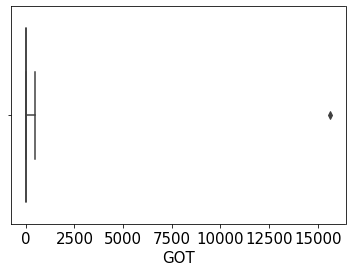

In [29]:
sns.boxplot(x = df["GOT"], data=df, whis = 1500)

### after

In [11]:
replace_value1 = df['GOT'][df['GOT'] < topnum2].max()
df.loc[df['GOT'] > topnum2,'GOT'] = replace_value1
replace_value2 = df['GOT'][df['GOT'] > bottomnum2].min()
df.loc[df['GOT'] < bottomnum2,'GOT'] = replace_value2

<AxesSubplot:xlabel='GOT'>

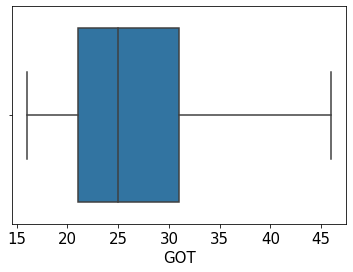

In [12]:
sns.boxplot(x = df["GOT"], data=df)

### 缺失值分析與處理

In [30]:
# 處理缺失數據
# 判斷各變數中是否存在缺失值
print(df.isnull().any(axis = 0))
print("==================================================")

outcome                                    False
AGE                                         True
SEX                                         True
LOS                                         True
Joint                                      False
Drain                                      False
Cemented                                   False
Commercial_ALBC                            False
Non_commercial_ALBC                        False
cci_index                                  False
elx_index                                  False
Blood_trans                                False
OP_time_minute                              True
OP_time_hour                                True
ASA                                         True
CBC_WBC                                     True
CBC_RBC                                     True
CBC_HG                                      True
CBC_HT                                      True
CBC_MCV                                     True
CBC_MCH             

In [31]:
# 各變數中缺失值的數量
print(df.isnull().sum(axis = 0))
print("==================================================")

outcome                                        0
AGE                                           94
SEX                                           94
LOS                                           94
Joint                                          0
Drain                                          0
Cemented                                       0
Commercial_ALBC                                0
Non_commercial_ALBC                            0
cci_index                                      0
elx_index                                      0
Blood_trans                                    0
OP_time_minute                             20106
OP_time_hour                               20106
ASA                                        20158
CBC_WBC                                    35751
CBC_RBC                                    35779
CBC_HG                                     27425
CBC_HT                                     27542
CBC_MCV                                    35800
CBC_MCH             

In [32]:
# 各變數中缺失值的比例
print(df.isnull().sum(axis = 0)/df.shape[0])
print("==================================================")

outcome                                    0.000000
AGE                                        0.001802
SEX                                        0.001802
LOS                                        0.001802
Joint                                      0.000000
Drain                                      0.000000
Cemented                                   0.000000
Commercial_ALBC                            0.000000
Non_commercial_ALBC                        0.000000
cci_index                                  0.000000
elx_index                                  0.000000
Blood_trans                                0.000000
OP_time_minute                             0.385475
OP_time_hour                               0.385475
ASA                                        0.386472
CBC_WBC                                    0.685423
CBC_RBC                                    0.685960
CBC_HG                                     0.525796
CBC_HT                                     0.528039
CBC_MCV     

In [36]:
# 用相關性探索缺失資料
missing_depend=df.isnull()
corr_matrix = missing_depend.corr()
#corr_matrix["missing_variable"].sort_values(ascending=False)
pd.DataFrame(corr_matrix)

outcome       AGE       SEX  \
outcome                                      NaN       NaN       NaN   
AGE                                          NaN  1.000000  1.000000   
SEX                                          NaN  1.000000  1.000000   
LOS                                          NaN  1.000000  1.000000   
Joint                                        NaN       NaN       NaN   
Drain                                        NaN       NaN       NaN   
Cemented                                     NaN       NaN       NaN   
Commercial_ALBC                              NaN       NaN       NaN   
Non_commercial_ALBC                          NaN       NaN       NaN   
cci_index                                    NaN       NaN       NaN   
elx_index                                    NaN       NaN       NaN   
Blood_trans                                  NaN       NaN       NaN   
OP_time_minute                               NaN  0.016499  0.016499   
OP_time_hour                                 NaN  0.016499  0.016499   
ASA                                          NaN  0.016405  0.016405   
CBC_WBC                                      NaN  0.018077  0.018077   
CBC_RBC                                      NaN  0.018037  0.018037   
CBC_HG                                       NaN  0.015910  0.015910   
CBC_HT                                       NaN  0.015723  0.015723   
CBC_MCV                                      NaN  0.018006  0.018006   
CBC_MCH                                      NaN  0.018999  0.018999   
CBC_MCHC                                     NaN  0.018021  0.018021   
CBC_RDW                                      NaN  0.018013  0.018013   
CBC_Platelet                                 NaN  0.018290  0.018290   
CBC_RDWCV                                    NaN  0.004423  0.004423   
BUN                                          NaN  0.013089  0.013089   
Crea                                         NaN  0.012695  0.012695   
GOT                                          NaN  0.012050  0.012050   
GPT                                          NaN  0.005872  0.005872   
ALB                                          NaN  0.007466  0.007466   
Na                                           NaN  0.008489  0.008489   
K                                            NaN  0.010883  0.010883   
UA                                           NaN  0.005178  0.005178   
Diagnosis                                    NaN       NaN       NaN   
Congestive Heart Failure                     NaN       NaN       NaN   
Cardiac Arrhythmia                           NaN       NaN       NaN   
Valvular Disease                             NaN       NaN       NaN   
Heart disease                                NaN       NaN       NaN   
Pulmonary Circulation Disorders              NaN       NaN       NaN   
Peripheral Vascular Disorders                NaN       NaN       NaN   
Hypertension Uncomplicated                   NaN       NaN       NaN   
Paralysis                                    NaN       NaN       NaN   
Other Neurological Disorders                 NaN       NaN       NaN   
Chronic Pulmonary Disease                    NaN       NaN       NaN   
Lung disease                                 NaN       NaN       NaN   
Diabetes                                     NaN       NaN       NaN   
Hypothyroidism                               NaN       NaN       NaN   
Renal Failure                                NaN       NaN       NaN   
Liver Disease                                NaN       NaN       NaN   
Peptic Ulcer Disease excluding bleeding      NaN       NaN       NaN   
AIDS/HIV                                     NaN       NaN       NaN   
Lymphoma                                     NaN       NaN       NaN   
Metastatic Cancer                            NaN       NaN       NaN   
Solid Tumor without Metastasis               NaN       NaN       NaN   
Cancer history                               NaN       NaN       NaN   
Rheumatoi

## 使用KNeighbor進行缺失值插補

In [37]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

def knn_filled_func(x_train, y_train, test, k = 3, dispersed = True):
    # params: x_train 為目標列不含缺失值的數據（不包括目標列）
    # params: y_train 為不含缺失值的目標列
    # params: test 為目標列為缺失值的數據（不包括目標列）
    if dispersed:
        knn= KNeighborsClassifier(n_neighbors = k, weights = "distance")
    else:
        knn= KNeighborsRegressor(n_neighbors = k, weights = "distance")
    
    knn.fit(x_train, y_train)

In [68]:
from sklearn.ensemble import RandomForestRegressor
def set_missing_ages(df):
    
    df = df.fillna(method="ffill")

    # 把已有的數據型特徵取出来丟進Random Forest Regressor中
    age_df = df[[ 'ASA','AGE','LOS', 'Drain']]

    # 數據分成兩部分
    known_age = age_df[age_df.ASA.notnull()].values
    unknown_age = age_df[age_df.ASA.isnull()].values

    # y即目標
    y = known_age[:, 0]

    # X即特徵属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型進行未知结果預測
    predictedAges = rfr.predict(unknown_age[:, 1:])
    
    # 用得到的预测结果填補原缺失数据
    df.loc[ (df.ASA.isnull()), 'ASA' ] = predictedAges 

    return df, rfr


In [1]:
dff, rfr = set_missing_ages(df)
dff

## 使用RandomForest進行缺失值插補

In [2]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

def knn_filled_func(x_train, y_train, test, k = 3, dispersed = True):
    # params: x_train 為目標列不含缺失值的數據（不包括目標列）
    # params: y_train 為不含缺失值的目標列
    # params: test 為目標列為缺失值的數據（不包括目標列）
    if dispersed:
        rf= RandomForestRegressor()
    else:
        rf= RandomForestClassifier()
    
    rf.fit(x_train, y_train)
    return test.index, rf.predict(test)

In [70]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52159 entries, 0 to 52158
Data columns (total 68 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   outcome                                  52159 non-null  int64  
 1   AGE                                      52065 non-null  float64
 2   SEX                                      52065 non-null  object 
 3   LOS                                      52065 non-null  float64
 4   Joint                                    52159 non-null  object 
 5   Drain                                    52159 non-null  int64  
 6   Cemented                                 52159 non-null  int64  
 7   Commercial_ALBC                          52159 non-null  int64  
 8   Non_commercial_ALBC                      52159 non-null  int64  
 9   cci_index                                52159 non-null  int64  
 10  elx_index                                52159

## 數據型態轉換實驗

In [87]:
for dtype in ['float','int64','object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 0.38 MB
Average memory usage for int64 columns: 0.39 MB
Average memory usage for object columns: 1.96 MB


In [74]:
import numpy as np
int_types = ["uint8", "int8", "int16"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------



In [75]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [79]:
gl_float = df.select_dtypes(include=['float'])
converted_float = gl_float.apply(pd.to_numeric,downcast='float')
print("before: ", mem_usage(gl_float))
print("after: ", mem_usage(converted_float))
compare_floats = pd.concat([gl_float.dtypes,converted_float.dtypes],axis=1)

before:  9.15 MB
after:  4.58 MB


In [83]:
gl_obj = df.select_dtypes(include=['object']).copy()
gl_obj.describe()

SEX  Joint
count   52065  52159
unique      2      2
top         F    TKA
freq    34786  35013

In [84]:
converted_obj = pd.DataFrame()

for col in gl_obj.columns:
    num_unique_values = len(gl_obj[col].unique())
    num_total_values = len(gl_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = gl_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = gl_obj[col]

In [86]:
print(mem_usage(gl_obj))            # 752.72 MB
print(mem_usage(converted_obj))     # 51.67 MB

5.87 MB
0.10 MB


In [88]:
print(df.shape)

(52159, 68)


In [89]:
# 判断数据中是否存在重复观测
print(df.duplicated().any())

True


In [91]:
df1 = df.drop_duplicates()

In [92]:
print(df1.shape)

(49141, 68)


In [103]:
df['outcome'] = df['outcome'].astype(np.uintc)

In [124]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52159 entries, 0 to 52158
Data columns (total 68 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   outcome                                  52159 non-null  int64   
 1   AGE                                      52065 non-null  float64 
 2   SEX                                      52065 non-null  category
 3   LOS                                      52065 non-null  float64 
 4   Joint                                    52159 non-null  object  
 5   Drain                                    52159 non-null  int64   
 6   Cemented                                 52159 non-null  int64   
 7   Commercial_ALBC                          52159 non-null  int64   
 8   Non_commercial_ALBC                      52159 non-null  int64   
 9   cci_index                                52159 non-null  int64   
 10  elx_index                         

## 數據標準化

In [112]:
def mean_norm(df_input):
    df_input = (df_input-df_input.mean())/ df_input.std()
    return df_input

df['LOS'] = df['LOS'].fillna(0).astype('float') 
df_mean_norm = mean_norm(df["LOS"])

In [113]:
df_mean_norm

0         0.824693
1        -0.210196
2         0.824693
3         2.894472
4        -0.555159
5        -0.210196
6         0.134767
7         9.793733
8         0.134767
9        -0.555159
10        0.134767
11        0.134767
12       -0.210196
13        0.134767
14       -0.900122
15        0.134767
16        0.134767
17       -0.210196
18       -0.555159
19       -0.555159
20        1.859582
21        0.479730
22       -0.210196
23       -0.555159
24       -0.900122
25        5.309213
26        0.134767
27       11.518548
28        0.479730
29       -0.555159
30       -0.555159
31        0.479730
32        0.134767
33       -0.555159
34        0.824693
35        1.169656
36       -0.210196
37        3.929361
38       -0.555159
39       -0.210196
40       -0.210196
41       -0.210196
42        0.479730
43        0.479730
44       -0.210196
45       -0.555159
46        2.894472
47        0.479730
48        0.824693
49       -0.210196
50        4.619287
51        0.134767
52       -0.

<AxesSubplot:>

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


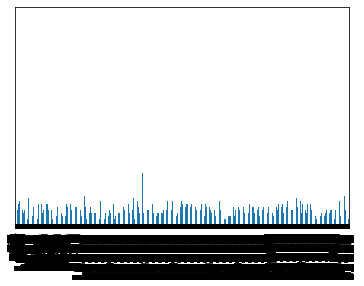

In [4]:
plt.yticks([])
df['LOS'].plot(kind='bar')

## test

In [118]:
sex_mapping = {"M": 0, "F": 1}
df["SEX"] = df["SEX"].map(sex_mapping)

In [119]:
df["SEX"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
30      NaN
31      NaN
32      NaN
33      NaN
34      NaN
35      NaN
36      NaN
37      NaN
38      NaN
39      NaN
40      NaN
41      NaN
42      NaN
43      NaN
44      NaN
45      NaN
46      NaN
47      NaN
48      NaN
49      NaN
50      NaN
51      NaN
52      NaN
53      NaN
54      NaN
55      NaN
56      NaN
57      NaN
58      NaN
59      NaN
60      NaN
61      NaN
62      NaN
63      NaN
64      NaN
65      NaN
66      NaN
67      NaN
68      NaN
69      NaN
70      NaN
71      NaN
72      NaN
73      NaN
74      NaN
75      NaN
76      NaN
77      NaN
78      NaN
79      NaN
80      NaN
81      NaN
82      NaN
83  

In [126]:
df['SEX'] = df['SEX'].astype('category') 
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [128]:
df['SEX']

0        F
1        M
2        M
3        M
4        F
5        F
6        M
7        F
8        M
9        M
10       F
11       M
12       M
13       F
14       M
15       F
16       M
17       M
18       F
19       F
20       F
21       M
22       F
23       M
24       F
25       F
26       M
27       F
28       F
29       M
30       M
31       M
32       M
33       F
34       F
35       F
36       F
37       F
38       F
39       F
40       M
41       M
42       F
43       M
44       F
45       M
46       M
47       F
48       F
49       F
50       M
51       M
52       M
53       M
54       F
55       M
56       F
57       M
58       F
59       M
60       M
61       M
62       F
63       F
64       M
65       M
66       F
67       F
68       M
69       F
70       M
71       F
72       F
73       F
74       M
75       M
76       M
77       F
78       F
79       F
80       F
81       M
82       M
83       F
84       F
85       F
86       F
87       F
88       F
89       F
90       M

In [129]:
df_mean_norm.round(2)

0         0.82
1        -0.21
2         0.82
3         2.89
4        -0.56
5        -0.21
6         0.13
7         9.79
8         0.13
9        -0.56
10        0.13
11        0.13
12       -0.21
13        0.13
14       -0.90
15        0.13
16        0.13
17       -0.21
18       -0.56
19       -0.56
20        1.86
21        0.48
22       -0.21
23       -0.56
24       -0.90
25        5.31
26        0.13
27       11.52
28        0.48
29       -0.56
30       -0.56
31        0.48
32        0.13
33       -0.56
34        0.82
35        1.17
36       -0.21
37        3.93
38       -0.56
39       -0.21
40       -0.21
41       -0.21
42        0.48
43        0.48
44       -0.21
45       -0.56
46        2.89
47        0.48
48        0.82
49       -0.21
50        4.62
51        0.13
52       -0.56
53       -1.25
54        0.82
55       -0.21
56        0.48
57        0.82
58        0.13
59        0.13
60        0.48
61       13.93
62       -0.21
63        0.13
64        0.48
65       -0.21
66        